In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()
df.columns


Index(['track_id', 'track_name', 'track_number', 'track_popularity',
       'explicit', 'artist_name', 'artist_popularity', 'artist_followers',
       'artist_genres', 'album_id', 'album_name', 'album_release_date',
       'album_total_tracks', 'album_type', 'track_duration_min'],
      dtype='object')

standardization 

In [4]:
# These are the only columns suitable for PCA in your current dataset
features = [
    'track_popularity',    # How popular the song is
    'artist_popularity',   # How popular the artist is
    'artist_followers',    # Total fan base size
    'album_total_tracks',  # Size of the project (Single vs. Massive Album)
    'track_duration_min'   # Length of the song
]

In [5]:
x = df[features]

# Step 2: Scaling (CRITICAL)
# Since followers are in millions and popularity is 0-100, we MUST scale.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Step 3: Run PCA
# We will look for 3 components initially
pca = PCA(n_components=3)
pca_results = pca.fit_transform(x_scaled)

# Step 4: Create a results DataFrame
pca_df = pd.DataFrame(
    data = pca_results, 
    columns = ['PC1', 'PC2', 'PC3']
)

# Step 5: Check the "Loadings" to see what your components mean
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2', 'PC3'], 
    index=features
)

print(loadings)

                         PC1       PC2       PC3
track_popularity    0.421381 -0.550715 -0.131152
artist_popularity   0.625048 -0.048868 -0.141725
artist_followers    0.558233  0.115188 -0.142618
album_total_tracks  0.213514  0.820943 -0.174487
track_duration_min  0.273020  0.084318  0.954949


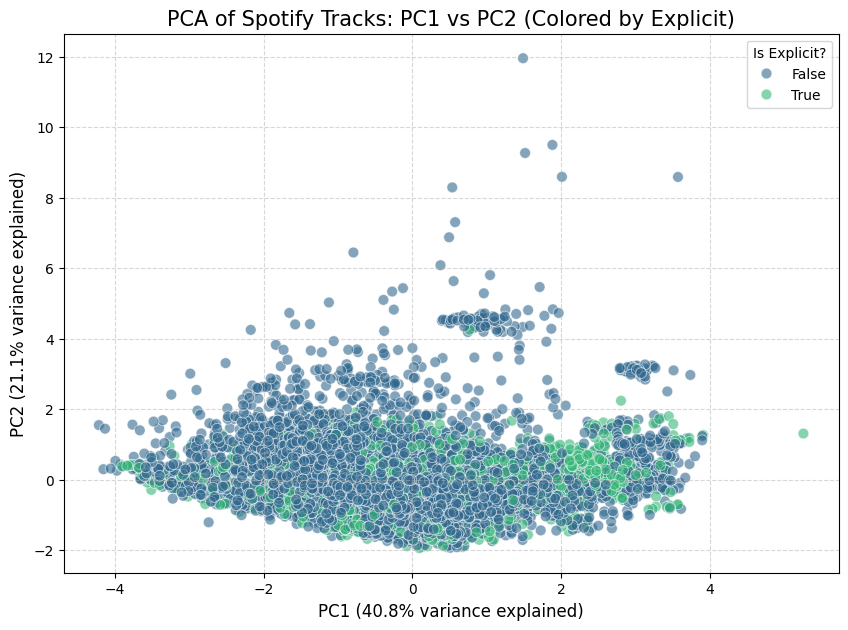

In [6]:


# 5. Add the 'explicit' column back from the original dataframe
# (Using .values to ensure the indices match)
pca_df['explicit'] = df['explicit'].values

# 6. Create the Scatter Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='explicit', 
    data=pca_df, 
    palette='viridis', 
    alpha=0.6,
    edgecolor='w',
    s=60
)

# Adding labels and titles
plt.title('PCA of Spotify Tracks: PC1 vs PC2 (Colored by Explicit)', fontsize=15)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance explained)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance explained)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Is Explicit?', loc='best')

plt.show()

In [17]:
# 1. Determine components for 85% variance
pca_reduced = PCA(n_components=0.85) 
X_pca = pca_reduced.fit_transform(x_scaled)

# 2. Create labels for the new columns
num_pcs = X_pca.shape[1]
pc_colnames = [f'PC{i+1}' for i in range(num_pcs)]

# 3. Create a DataFrame for the PCA results
# We use df1.index to ensure the rows align perfectly
df_pca_values = pd.DataFrame(X_pca, columns=pc_colnames, index=df.index)

# 4. PRESERVE ORIGINAL DATA: Concatenate df1 and the new PCA columns
# This keeps all your original columns and adds PC1, PC2, etc. at the end
df_final = pd.concat([df, df_pca_values], axis=1)

# 5. Save the full enriched dataset to CSV


# Summary Output
print(f"Original columns preserved: {list(df.columns)}")
print(f"Reduced {len(features)} features down to {num_pcs} components.")
print(f"Total variance captured: {pca_reduced.explained_variance_ratio_.sum():.2%}")

Original columns preserved: ['track_id', 'track_name', 'track_number', 'track_popularity', 'explicit', 'artist_name', 'artist_popularity', 'artist_followers', 'artist_genres', 'album_id', 'album_name', 'album_release_date', 'album_total_tracks', 'album_type', 'track_duration_min', 'PC1', 'PC2', 'PC3', 'PC4']
Reduced 5 features down to 4 components.
Total variance captured: 93.93%


In [15]:
df_final.columns


Index(['track_id', 'track_name', 'track_number', 'track_popularity',
       'explicit', 'artist_name', 'artist_popularity', 'artist_followers',
       'artist_genres', 'album_id', 'album_name', 'album_release_date',
       'album_total_tracks', 'album_type', 'track_duration_min', 'PC1', 'PC2',
       'PC3', 'PC4', 'PC1', 'PC2', 'PC3', 'PC4'],
      dtype='object')

In [19]:
# 1. Remove duplicate columns (keeping the first occurrence)
df_final = df_final.loc[:, ~df_final.columns.duplicated()]

# 2. Verify the new index
print("Cleaned Columns:")
print(df_final.columns)

# 3. Optional: If you want to be extra safe and 'reset' the PC columns 
# from your most recent PCA run:
original_cols = ['track_id', 'track_name', 'track_number', 'track_popularity', 
                 'explicit', 'artist_name', 'artist_popularity', 'artist_followers', 
                 'artist_genres', 'album_id', 'album_name', 'album_release_date', 
                 'album_total_tracks', 'album_type', 'track_duration_min']

# Re-filter the dataframe to only original columns, then add your new PC results
df_final = df_final[original_cols].copy()
df_final = pd.concat([df_final, df_pca_values], axis=1)

Cleaned Columns:
Index(['track_id', 'track_name', 'track_number', 'track_popularity',
       'explicit', 'artist_name', 'artist_popularity', 'artist_followers',
       'artist_genres', 'album_id', 'album_name', 'album_release_date',
       'album_total_tracks', 'album_type', 'track_duration_min', 'PC1', 'PC2',
       'PC3', 'PC4'],
      dtype='object')


In [ ]:
df_final.to_csv('pca_cleaned_data.csv', index=False)

In [21]:
df_final.head()


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,PC1,PC2,PC3,PC4
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55,-1.594023,0.642742,-1.367944,-1.417814
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07,-1.765675,0.242342,0.217033,-1.573153
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55,-2.370032,0.141625,-0.150820,-1.393124
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69,-1.027055,-0.039847,-1.406788,-0.617202
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39,-2.466848,0.289879,-0.287206,-1.465512
